# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units = "metric"
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | tagusao
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | harlow
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | doctor pedro p. pena
City not found. Skipping...
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | bethanien
Processing Record 10 of Set 1 | nexo
Processing Record 11 of Set 1 | fairbanks
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | airai
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | road town
Processing Record 21 of Set 1 | samusu
City not found. Skipping...
Processing Record 22 of Set 1 | bengkulu
Processing Record 23 o

Processing Record 37 of Set 4 | ornskoldsvik
Processing Record 38 of Set 4 | codrington
Processing Record 39 of Set 4 | laukaa
Processing Record 40 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 41 of Set 4 | iberia
Processing Record 42 of Set 4 | savannakhet
Processing Record 43 of Set 4 | mana
Processing Record 44 of Set 4 | katsuura
Processing Record 45 of Set 4 | saskylakh
Processing Record 46 of Set 4 | bilibino
Processing Record 47 of Set 4 | necochea
Processing Record 48 of Set 4 | bredasdorp
Processing Record 49 of Set 4 | fortuna
Processing Record 0 of Set 5 | beyneu
Processing Record 1 of Set 5 | rocha
Processing Record 2 of Set 5 | muros
Processing Record 3 of Set 5 | ozernovskiy
Processing Record 4 of Set 5 | sorvag
City not found. Skipping...
Processing Record 5 of Set 5 | iracoubo
Processing Record 6 of Set 5 | acapulco
Processing Record 7 of Set 5 | zdvinsk
Processing Record 8 of Set 5 | ponta do sol
Processing Record 9 of Set 5 | kapuskasing
Proces

Processing Record 27 of Set 8 | inhambane
Processing Record 28 of Set 8 | qaqortoq
Processing Record 29 of Set 8 | pangnirtung
Processing Record 30 of Set 8 | tessalit
Processing Record 31 of Set 8 | alberton
Processing Record 32 of Set 8 | szod
Processing Record 33 of Set 8 | haibowan
City not found. Skipping...
Processing Record 34 of Set 8 | wladyslawowo
Processing Record 35 of Set 8 | mirpur sakro
Processing Record 36 of Set 8 | mrirt
City not found. Skipping...
Processing Record 37 of Set 8 | raymondville
Processing Record 38 of Set 8 | ketchikan
Processing Record 39 of Set 8 | kitimat
Processing Record 40 of Set 8 | seoul
Processing Record 41 of Set 8 | mrakovo
Processing Record 42 of Set 8 | paamiut
Processing Record 43 of Set 8 | yumen
Processing Record 44 of Set 8 | cherskiy
Processing Record 45 of Set 8 | tingrela
City not found. Skipping...
Processing Record 46 of Set 8 | nouadhibou
Processing Record 47 of Set 8 | zhanakorgan
Processing Record 48 of Set 8 | divnomorskoye
Pro

City not found. Skipping...
Processing Record 14 of Set 12 | nguiu
City not found. Skipping...
Processing Record 15 of Set 12 | wembley
Processing Record 16 of Set 12 | cabedelo
Processing Record 17 of Set 12 | coihaique
Processing Record 18 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 19 of Set 12 | hilton head island
Processing Record 20 of Set 12 | townsville
Processing Record 21 of Set 12 | umba
Processing Record 22 of Set 12 | birjand
Processing Record 23 of Set 12 | mezen
Processing Record 24 of Set 12 | blagoyevo
Processing Record 25 of Set 12 | grand-santi
Processing Record 26 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 27 of Set 12 | tarko-sale
Processing Record 28 of Set 12 | odweyne
Processing Record 29 of Set 12 | hirara
Processing Record 30 of Set 12 | thunder bay
Processing Record 31 of Set 12 | erenhot
Processing Record 32 of Set 12 | hemnes
City not found. Skipping...
Processing Record 33 of Set 12 | ahuimanu
Processing Rec

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          538
Lat           538
Lng           538
Max Temp      538
Humidity      538
Cloudiness    538
Wind Speed    538
Country       538
Date          538
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tagusao,9.1924,117.8141,25.87,84,57,1.88,PH,1670454750
1,harlow,51.7766,0.1116,0.56,91,11,2.06,GB,1670454751
2,carnarvon,-24.8667,113.6333,21.98,61,57,6.50,AU,1670454751
3,qaanaaq,77.4840,-69.3632,-11.13,67,83,3.76,GL,1670454752
4,busselton,-33.6500,115.3333,16.99,72,53,2.81,AU,1670454541


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tagusao,9.1924,117.8141,25.87,84,57,1.88,PH,1670454750
1,harlow,51.7766,0.1116,0.56,91,11,2.06,GB,1670454751
2,carnarvon,-24.8667,113.6333,21.98,61,57,6.50,AU,1670454751
3,qaanaaq,77.4840,-69.3632,-11.13,67,83,3.76,GL,1670454752
4,busselton,-33.6500,115.3333,16.99,72,53,2.81,AU,1670454541


In [10]:
lat_v_temp_df = city_data_df.loc[:, ["Lat","Max Temp"]]
lat_v_temp_df

,Lat,Max Temp
City_ID,,
0,9.1924,25.87
1,51.7766,0.56
2,-24.8667,21.98
3,77.4840,-11.13
4,-33.6500,16.99
...,...,...
533,21.4447,27.84
534,-5.8581,19.71
535,43.4065,8.42


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

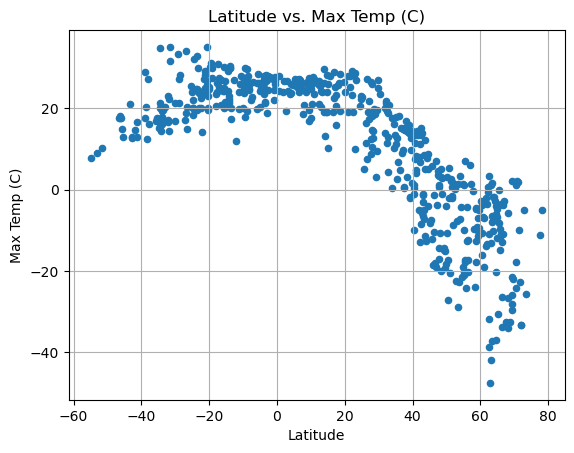

In [15]:
lat_v_temp_df.plot.scatter("Lat", "Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Latitude vs. Max Temp (C)")
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig1.png")
# Show plot
plt.show()


In [16]:
lat_v_humid_df = city_data_df.loc[:, ["Lat","Humidity"]]
lat_v_humid_df

,Lat,Humidity
City_ID,,
0,9.1924,84
1,51.7766,91
2,-24.8667,61
3,77.4840,67
4,-33.6500,72
...,...,...
533,21.4447,73
534,-5.8581,80
535,43.4065,94


#### Latitude Vs. Humidity

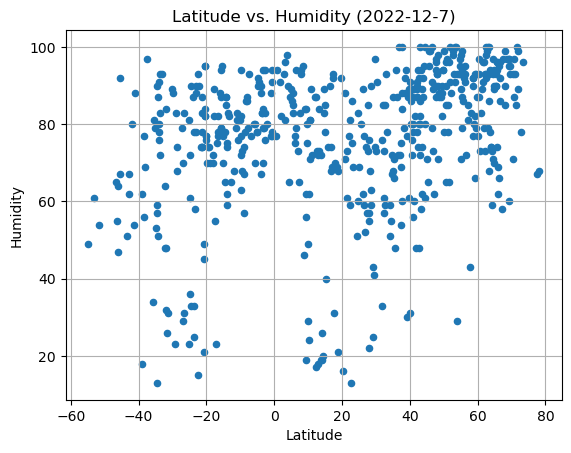

In [17]:
lat_v_humid_df.plot.scatter("Lat", "Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity (2022-12-7)")
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig2.png")
# Show plot
plt.show()

In [18]:
lat_v_cloud_df = city_data_df.loc[:, ["Lat","Cloudiness"]]
lat_v_cloud_df

,Lat,Cloudiness
City_ID,,
0,9.1924,57
1,51.7766,11
2,-24.8667,57
3,77.4840,83
4,-33.6500,53
...,...,...
533,21.4447,75
534,-5.8581,94
535,43.4065,100


#### Latitude Vs. Cloudiness

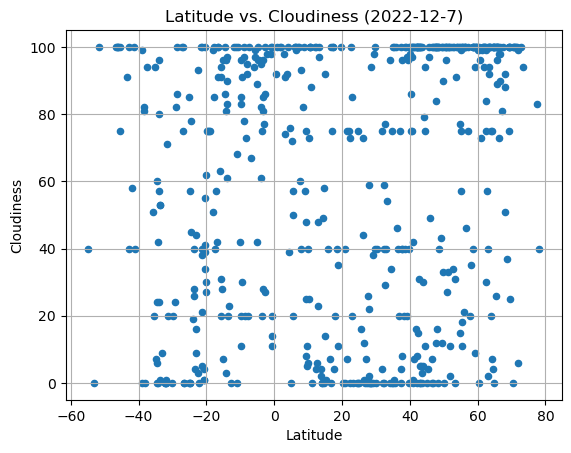

In [20]:
lat_v_cloud_df.plot.scatter("Lat", "Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness (2022-12-7)")
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig3.png")
# Show plot
plt.show()

In [21]:
lat_v_wind_df = city_data_df.loc[:, ["Lat","Wind Speed"]]
lat_v_wind_df

,Lat,Wind Speed
City_ID,,
0,9.1924,1.88
1,51.7766,2.06
2,-24.8667,6.50
3,77.4840,3.76
4,-33.6500,2.81
...,...,...
533,21.4447,8.75
534,-5.8581,0.47
535,43.4065,5.14


#### Latitude vs. Wind Speed Plot

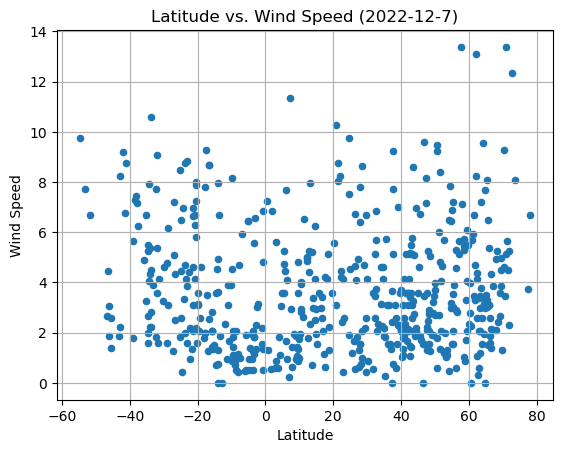

In [22]:
lat_v_wind_df.plot.scatter("Lat", "Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed (2022-12-7)")
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig4.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def regression_plot(x, y, y_col, hemi):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="blue", alpha=.5)
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq,(min(x), min(y)),fontsize=15,color="red")
    plt.xlabel("Latitude (" + hemi + ")")
    plt.ylabel(y_col)
    print('The r-value is: ' + str(rvalue ** 2))
    plt.show()


In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tagusao,9.1924,117.8141,25.87,84,57,1.88,PH,1670454750
1,harlow,51.7766,0.1116,0.56,91,11,2.06,GB,1670454751
3,qaanaaq,77.4840,-69.3632,-11.13,67,83,3.76,GL,1670454752
7,nexo,55.0607,15.1306,1.05,89,99,6.89,DK,1670454754
8,fairbanks,64.8378,-147.7164,-6.71,90,100,0.00,US,1670454265


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,carnarvon,-24.8667,113.6333,21.98,61,57,6.50,AU,1670454751
4,busselton,-33.6500,115.3333,16.99,72,53,2.81,AU,1670454541
5,punta arenas,-53.1500,-70.9167,8.95,61,0,7.72,CL,1670454622
6,bethanien,-26.5020,17.1583,20.15,31,0,2.51,NaN,1670454753
11,airai,-8.9266,125.4092,19.25,57,78,0.72,TL,1670454756


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7102359160025098


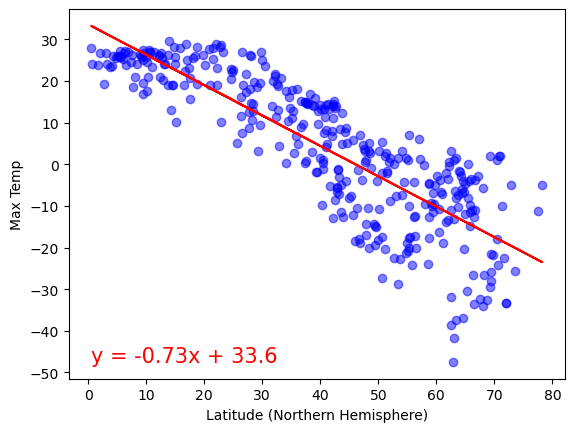

In [44]:
# Linear regression on Northern Hemisphere
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], "Max Temp", "Northern Hemisphere")

The r-value is: 0.2644402269926772


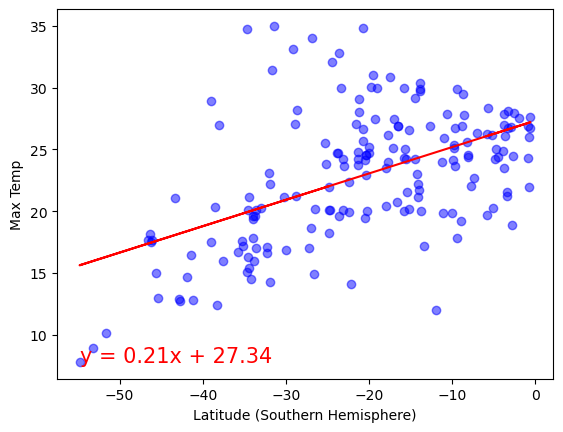

In [45]:
# Linear regression on Southern Hemisphere
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], "Max Temp", "Southern Hemisphere")


In [ ]:
# There is a strong negative correlation between the Northern Hemisphere Max Temp vs Latitude, as the latitude increases, the Max Temp decreases.
# There is a weak positive correlation between the Southern Hemisphere Max Temp vs Latitude, as the latitude increases, The Max Temp increase
# It makes sense intuitively as you get closer to the equator, the temperature increases, as you move away the temp decreases.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1277155643215641


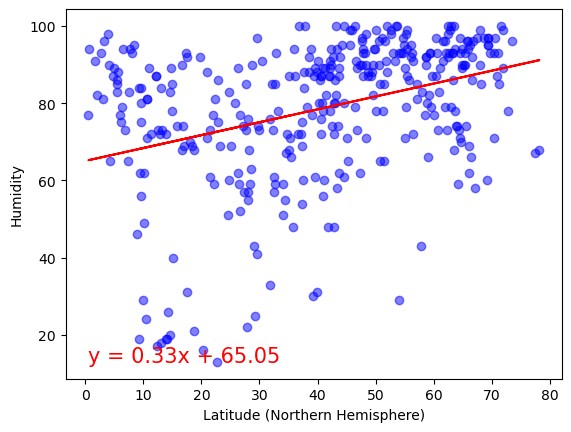

In [46]:
# Northern Hemisphere
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], "Humidity", "Northern Hemisphere")

The r-value is: 0.1264460211975698


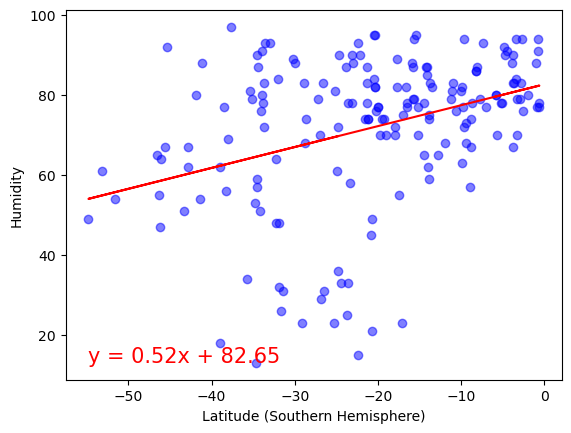

In [53]:
# Southern Hemisphere
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], "Humidity", "Southern Hemisphere")

In [ ]:
# There is a weak positive correlation between the Northern Hemisphere HUmidity vs Latitude, as the latitude increases, the Humidity increase.
# There is a weak positive correlation between the Southern Hemisphere Humidity vs Latitude, as the latitude increases, The Humidityincrease
 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06053898931010815


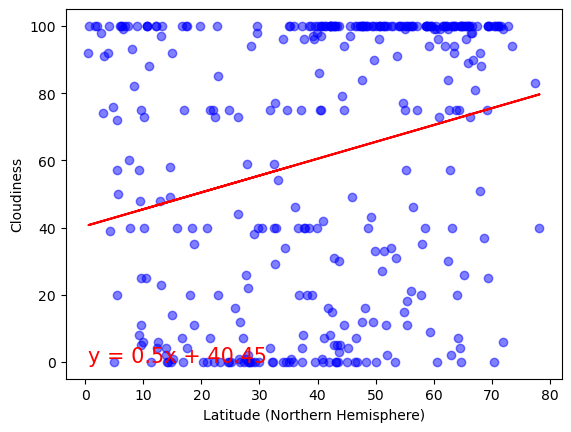

In [48]:
# Northern Hemisphere
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], "Cloudiness", "Northern Hemisphere")

The r-value is: 0.029769688841069918


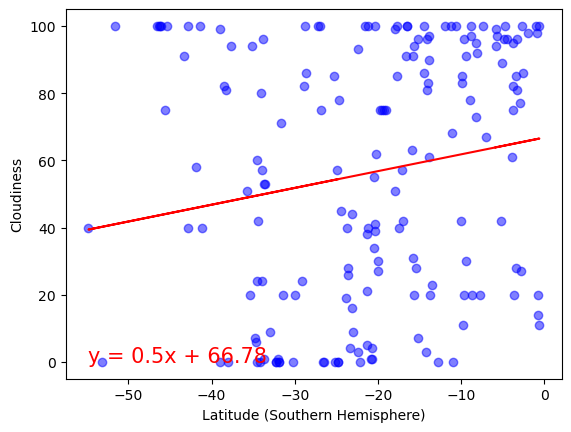

In [54]:
# Southern Hemisphere
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Cloudiness", "Southern Hemisphere")

In [ ]:
# There is almost no correlation on both Northern and Southern Hemisphere between Latitude and Cloudiness

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.015447608679263695


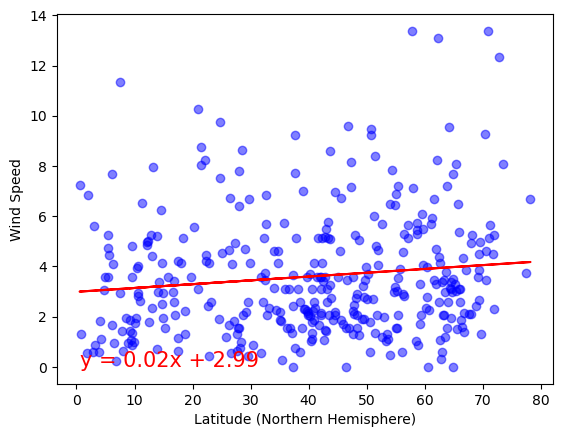

In [51]:
# Northern Hemisphere
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], "Wind Speed", "Northern Hemisphere")

The r-value is: 0.13897476975965456


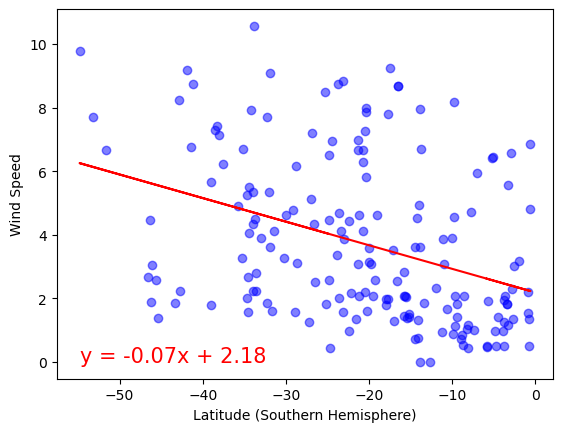

In [55]:
# Southern Hemisphere
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], "Wind Speed", "Southern Hemisphere")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# Northern Hemisphere almost has no correlation between Latitude and Windspeed.
# While the southern Hemisphere has some correlation, it is not very strong.